# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [4]:
data=pd.read_csv(r'C:\Users\Khaled\.spyder-py3\Regression1V.txt',header=None,names=['Population','Profit'])

# Show Data Details

In [5]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [6]:
# We use this command to show the first 5Rows in data 
# NOTE: head can take prmater like==>head(10) 
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
# We use this command to show the last 5Rows in data 
# NOTE:tail can take prmater like==>tail(10) 
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [8]:
# We use this command to show count , mean , std .....ex
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# Draw Data

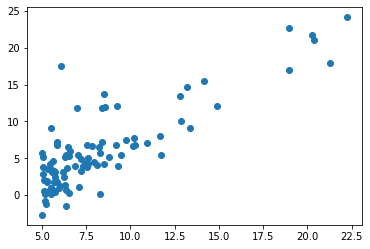

In [9]:
plt.scatter(data['Population'],data['Profit'])

In [19]:
# Adding new column called ones before data
data.insert(0,'Ones',1)

In [16]:
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [20]:
# separate X (training data) from y (target variable)
cols = data.shape[1]      #===>Number of columns        Note:: Number of column=3
X = data.iloc[:,0:cols-1]   #cols-1=2 ==>column 1,2    
y = data.iloc[:,cols-1:cols] #2:3

In [24]:
X.head(10)

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
5,1,8.3829
6,1,7.4764
7,1,8.5781
8,1,6.4862
9,1,5.0546


In [25]:
y.head(10)

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233
5,11.8860
6,4.3483
7,12.0000
8,6.5987
9,3.8166


In [41]:
# convert from data frames to numpy matrices
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [90]:
def compute_cost(X,y,theta):
    z=np.power(((X*theta.T)-y),2)
    return np.sum(z)/(2*len(X))

In [93]:
compute_cost(X,y,theta)

32.072733877455676

## GradientDescen

In [94]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            theta = temp
            cost[i] = compute_cost(X, y, theta)
    return theta, cost      

In [95]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

In [96]:
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [100]:
print('g = ' , g)

g =  [[-3.24140214  1.1272942 ]]


In [106]:
#cost
cost[0:100]

array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
       5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
       5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
       5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
       5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
       5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
       5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
       5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
       5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
       5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
       5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
       5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
       5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
       5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
       5.59062326, 5.58661195, 5.58261509, 5.57863263, 5.57466

In [107]:
compute_cost(X, y, g)

4.515955503078914

# get best fit line

In [110]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)

In [112]:
f = g[0, 0] + (g[0, 1] * x)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

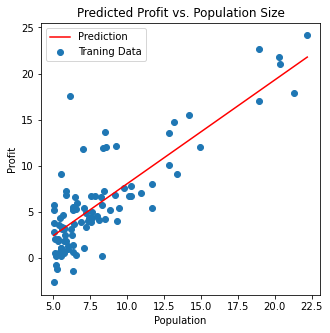

In [140]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

# draw error graph

Text(0.5, 1.0, 'Error vs. Training Epoch')

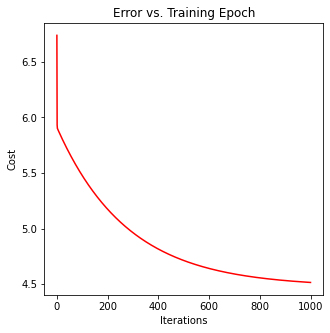

In [134]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
